# Simulated Annealing, Local Beam Search

1. Import the necessary libraries: numpy, matplotlib, networkx, and time.
2. Define the coordinates of the cities using the provided numpy array.
3. Define a function to calculate the distance between two cities.
4. Define a function to calculate the total distance of a path.
5. Define a function to visualize the path using networkx and matplotlib.
6. Define the Hill Climbing algorithm:
   - Start with a random solution (path).
   - Calculate the total distance of the current path.
   - Generate a new path by swapping two cities in the current path.
   - Calculate the total distance of the new path.
   - If the new path is shorter, replace the current path with the new path.
   - Repeat the process until no shorter path is found.
7. Define the Simulated Annealing algorithm:
   - Start with a random solution (path).
   - Calculate the total distance of the current path.
   - Generate a new path by swapping two cities in the current path.
   - Calculate the total distance of the new path.
   - If the new path is shorter, replace the current path with the new path.
   - If the new path is longer, replace the current path with the new path with a certain probability.
   - Repeat the process until no shorter path is found or the temperature is too low.
8. Define the Local Beam Search algorithm:
   - Start with a set of random solutions (paths).
   - Calculate the total distance of each path.
   - Generate new paths by swapping two cities in each current path.
   - Select the best paths.
   - Repeat the process until no shorter path is found.
9. Run each algorithm and measure the time it takes.
10. Visualize the best path found by each algorithm.

## Import Libraries

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import time
from itertools import permutations
import random

## Helper functions and Classes

In [67]:
# Define the coordinates of the cities
coordinates = np.array([[1, 2], [1, 4], [2, 6], [7, 3], [8, 1], [8, 12], 
[13, 24], [15, 16], [20, 5], [18, 4], [21, 22]])

# Define a function to calculate the distance between two cities
def distance(city1, city2):
    return np.sqrt((city1[0] - city2[0])**2 + (city1[1] - city2[1])**2)

# Define a function to calculate the total distance of a path
def total_distance(path):
    return sum(distance(coordinates[path[i - 1]], coordinates[path[i]]) for i in range(len(path)))

# Define a function to visualize the path
def visualize_path(path):
    G = nx.Graph()
    G.add_nodes_from(path)
    G.add_edges_from((path[i - 1], path[i]) for i in range(len(path)))
    nx.draw(G, coordinates, with_labels=True)
    plt.show()

## Hill Climbing

In [68]:
# Define the Hill Climbing algorithm
def hill_climbing():
    # Start with a random solution
    time_complexity = 0
    path = np.random.permutation(len(coordinates))
    while True:
        time_complexity += 1
        distances = [total_distance(np.concatenate((path[:i], path[i:i+2][::-1], path[i+2:]))) for i in range(len(path) - 1)]
        if min(distances) >= total_distance(path):
            # No improvement, end the algorithm
            return path, time_complexity
        # Swap two cities to get a shorter path
        i = distances.index(min(distances))
        path = np.concatenate((path[:i], path[i:i+2][::-1], path[i+2:]))

## Hill Climbing Variants

### First Choice Hill Climbing

In [69]:
# Define the First-Choice Hill Climbing algorithm
def first_choice_hill_climbing():
    time_complexity = 0
    # Start with a random solution
    path = np.random.permutation(len(coordinates))
    while True:
        time_complexity += 1
        i = np.random.randint(0, len(coordinates) - 1)
        new_path = np.concatenate((path[:i], path[i:i+2][::-1], path[i+2:]))
        if total_distance(new_path) < total_distance(path):
            path = new_path
        else:
            # No improvement, end the algorithm
            return path,time_complexity

### Random Restart Hill Climbing

In [70]:
# Define the Random-Restart Hill Climbing algorithm
def random_restart_hill_climbing():
    time_complexity = 0
    best_path = np.random.permutation(len(coordinates))
    for _ in range(100):  # Perform 100 restarts
        path = np.random.permutation(len(coordinates))
        while True:
            time_complexity += 1
            distances = [total_distance(np.concatenate((path[:i], path[i:i+2][::-1], path[i+2:]))) for i in range(len(path) - 1)]
            if min(distances) >= total_distance(path):
                # No improvement, end the algorithm
                break
            # Swap two cities to get a shorter path
            i = distances.index(min(distances))
            path = np.concatenate((path[:i], path[i:i+2][::-1], path[i+2:]))
        if total_distance(path) < total_distance(best_path):
            best_path = path
    return best_path, time_complexity

### Stochastic Hill Climbing

In [71]:
# Define the Stochastic Hill Climbing algorithm
def stochastic_hill_climbing():
    time_complexity = 0
    # Start with a random solution
    path = np.random.permutation(len(coordinates))
    while True:
        time_complexity += 1
        neighbors = [np.concatenate((path[:i], path[i:i+2][::-1], path[i+2:])) for i in range(len(path) - 1)]
        distances = [total_distance(neighbor) for neighbor in neighbors]
        if min(distances) >= total_distance(path):
            # No improvement, end the algorithm
            return path,time_complexity
        # Select a neighbor randomly, with probability proportional to the improvement it provides
        probabilities = [max(0, total_distance(path) - distance) for distance in distances]
        total_probability = sum(probabilities)
        probabilities = [probability / total_probability for probability in probabilities]
        path = neighbors[np.random.choice(len(neighbors), p=probabilities)]

## Simulated Annealing

In [72]:
# Define the Simulated Annealing algorithm
def simulated_annealing():
    time_complexity = 0
    # Start with a random solution
    path = np.random.permutation(len(coordinates))
    T = len(coordinates)
    while T > 0.01:
        time_complexity += 1
        i = np.random.randint(0, len(coordinates) - 1)
        new_path = np.concatenate((path[:i], path[i:i+2][::-1], path[i+2:]))
        delta = total_distance(new_path) - total_distance(path)
        if delta < 0 or np.random.rand() < np.exp(-delta / T):
            path = new_path
        T *= 0.99
    return path, time_complexity

## Local Beam Search

In [73]:
# Define the Local Beam Search algorithm
def local_beam_search():
    time_complexity = 0
    k = 10
    # Start with k random solutions
    paths = [np.random.permutation(len(coordinates)) for _ in range(k)]
    while True:
        new_paths = []
        for path in paths:
            for i in range(len(path) - 1):
                new_paths.append(np.concatenate((path[:i], path[i:i+2][::-1], path[i+2:])))
        paths = sorted(new_paths, key=total_distance)[:k]
        if total_distance(paths[0]) >= total_distance(paths[1]):
            # No improvement, end the algorithm
            return paths[0],time_complexity

## Run Experiments

hill_climbing took 0.0 seconds and found a path with total distance 125.69929850154341
hill_climbing has a time complexity of 5


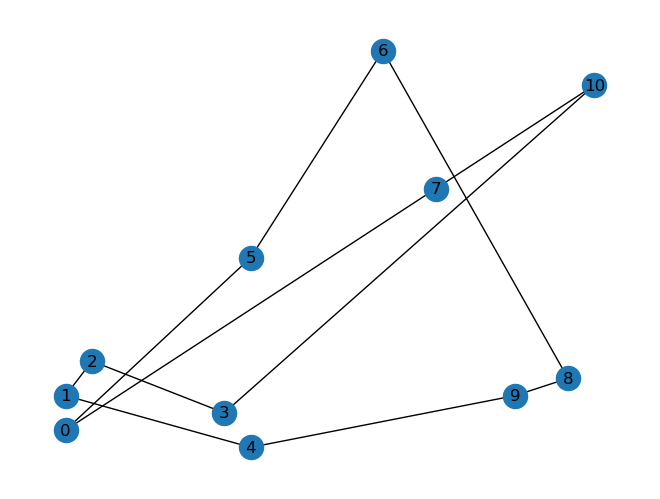

first_choice_hill_climbing took 0.0 seconds and found a path with total distance 163.6747502692245
first_choice_hill_climbing has a time complexity of 1


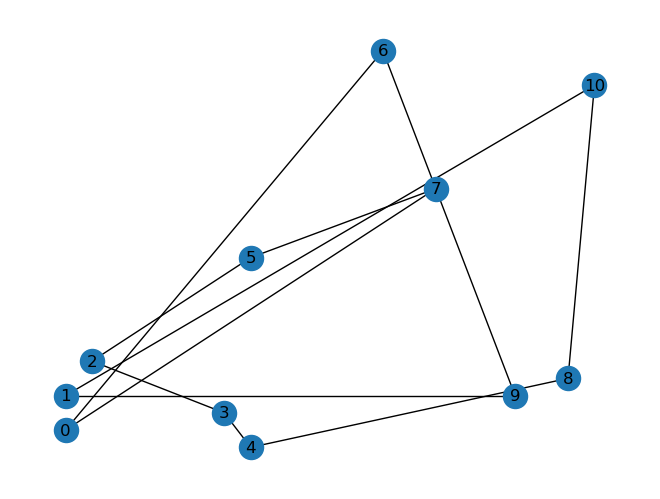

random_restart_hill_climbing took 0.23267626762390137 seconds and found a path with total distance 80.68438590782678
random_restart_hill_climbing has a time complexity of 557


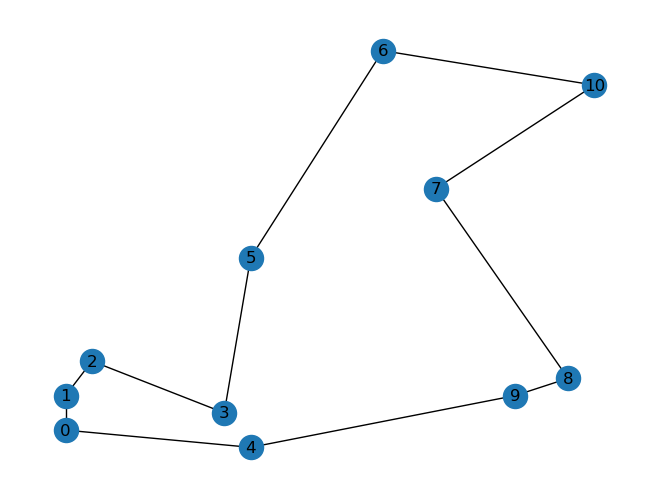

stochastic_hill_climbing took 0.0 seconds and found a path with total distance 125.74462939060886
stochastic_hill_climbing has a time complexity of 4


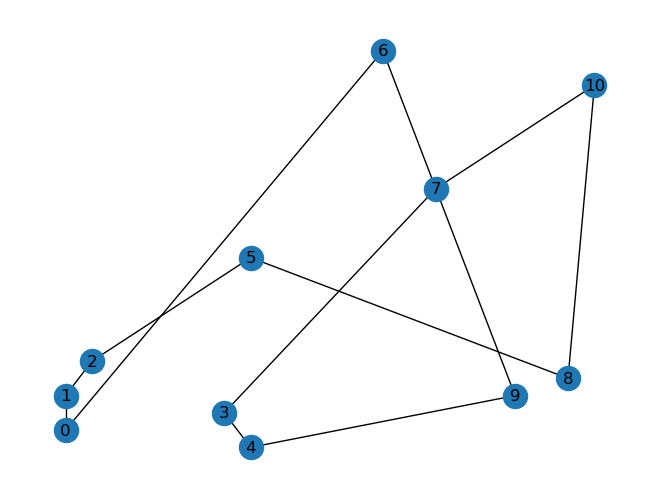

In [74]:
# Run each algorithm and measure the time it takes
for algorithm in [hill_climbing, first_choice_hill_climbing, random_restart_hill_climbing, stochastic_hill_climbing]:
    start_time = time.time()
    path, time_complexity = algorithm()
    end_time = time.time()
    print(f"{algorithm.__name__} took {end_time - start_time} seconds and found a path with total distance {total_distance(path)}")
    print(f"{algorithm.__name__} has a time complexity of {time_complexity}")
    visualize_path(path)